# Przewidywanie chorób serca


### Przetwarzanie danych

In [73]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [9]:
data = pd.read_csv('./heart.csv')
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
5,58,0,0,100,248,0,0,122,0,1.0,1,0,2,1
6,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
7,55,1,0,160,289,0,0,145,1,0.8,1,1,3,0
8,46,1,0,120,249,0,0,144,0,0.8,2,0,3,0
9,54,1,0,122,286,0,0,116,1,3.2,1,2,2,0


In [10]:
data.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
1015,58,1,0,128,216,0,0,131,1,2.2,1,3,3,0
1016,65,1,3,138,282,1,0,174,0,1.4,1,1,2,0
1017,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
1018,41,1,0,110,172,0,0,158,0,0.0,2,0,3,0
1019,47,1,0,112,204,0,1,143,0,0.1,2,0,2,1
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1
1024,54,1,0,120,188,0,1,113,0,1.4,1,1,3,0


### Opis kazdej z kolumn:
1. age - age in years
2. sex - (1 = male; 0 = female)
3. chest pain type (4 values) - chest pain type
4. resting blood pressure - resting blood pressure (in mm Hg on admission to the hospital)
5. serum cholestoral in mg/dl - serum cholestoral in mg/dl
6. fasting blood sugar > 120 mg/dl - (1 = true; 0 = false)
7. resting electrocardiographic results (values 0,1,2) - resting electrocardiographic results
8. maximum heart rate achieved
9. exercise induced angina - (1 = yes; 0 = no)
10. oldpeak = ST depression induced by exercise relative to rest
11. the slope of the peak exercise ST segment
12. number of major vessels (0-3) colored by flourosopy
13. thal: 0 = normal; 1 = fixed defect; 2 = reversable defect
14. target: 1 - heart disease; 0 - without heart disease

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [12]:
print("Number of Rows:", data.shape[0])
print("Number of Columns:", data.shape[1])

Number of Rows: 1025
Number of Columns: 14


### Sprawdzenie dla wartości NULL


In [13]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

wszędzie mamy zera, czyli nie mamy żadnych nulli

### Sprawdzenie dla duplikatów

In [14]:
data_d = data.duplicated().any()
data_d

True

Jak widać posiadamy duplikaty, możemy je usunąć i zobaczyć ile ich usunęliśmy

In [15]:
data.shape

(1025, 14)

In [16]:
data = data.drop_duplicates()

In [17]:
data.shape

(302, 14)

### Ogólne statystyki datasetu

In [18]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Correlation Matrix

<AxesSubplot:>

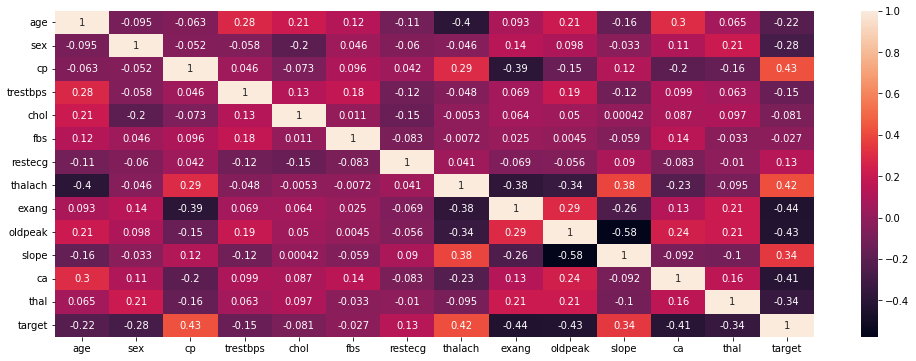

In [19]:
plt.figure(figsize=(17,6))
sns.heatmap(data.corr(),annot=True)

## Teraz sprawdźmy ile osób z naszych danych posiada, 
## a ile nie posiada chorób serca

c:\Users\dolid\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

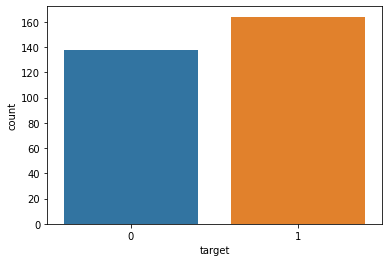

In [20]:
sns.countplot(data['target'])

## Porównanie między płciami

c:\Users\dolid\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


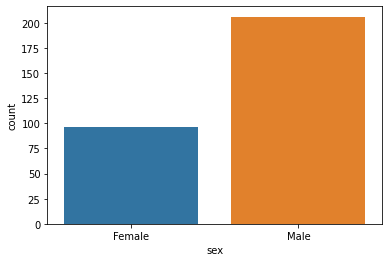

In [21]:
sns.countplot(data['sex'])
plt.xticks([0,1],['Female', 'Male'])
plt.show()

Widzimy dużą przewagę mężczyzn w naszym datasecie, zobaczmy teraz jak przekłada się to na choroby serca

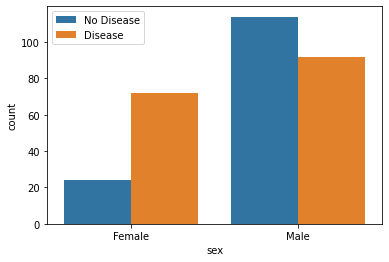

In [22]:
sns.countplot(x='sex',hue="target",data=data)
plt.xticks([1,0],['Male','Female'])
plt.legend(labels = ['No Disease','Disease'])
plt.show()

## Porownanie dla wieku

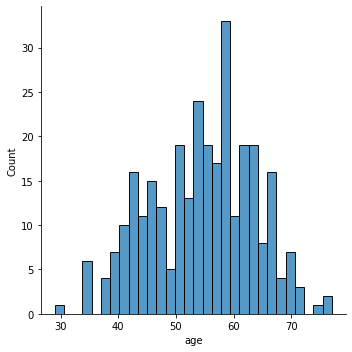

In [23]:
sns.displot(x='age', data=data, bins=30)
plt.show();

#### Porownanie płci i rodzaju bólu klatki piersiowej

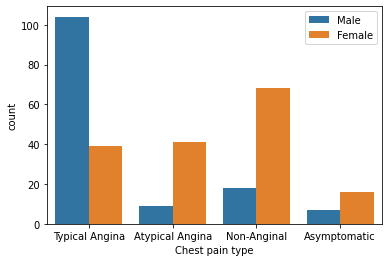

In [24]:
sns.countplot(x='cp',hue="target",data=data)
plt.xticks([3,2,1,0],['Asymptomatic','Non-Anginal', 'Atypical Angina', 'Typical Angina'])
plt.legend(labels = ['Male','Female'])
plt.xlabel("Chest pain type")
plt.show()



## Porownanie dla maksymalnego tętna bicia serca

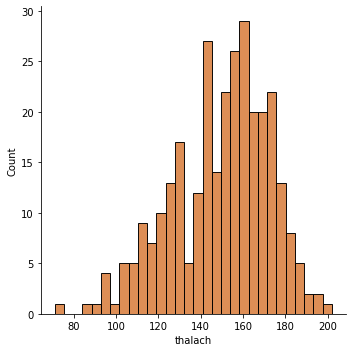

In [25]:
sns.displot(x='thalach', data=data, bins=30,  color='chocolate')
plt.show();

#### Porownanie wieku i tętna bicia serca u ludzi posiadających chorobę serca

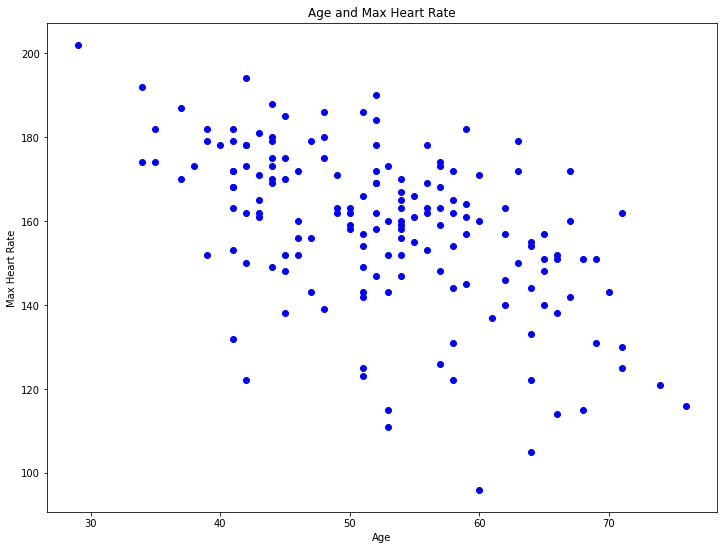

In [26]:
plt.figure(figsize=(12,9))

plt.scatter(data.age[data.target==1], data.thalach[data.target==1], c="blue")

plt.title("Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate");

#### Porownanie ludzi z chorobami serca i maksymalnego tętna bicia serca 

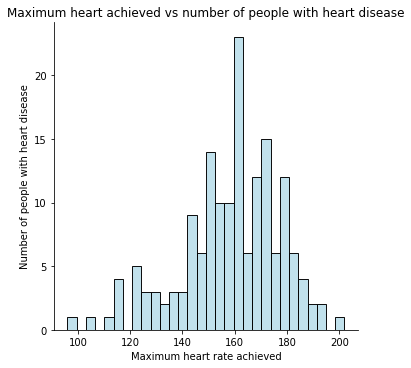

In [27]:
sns.displot(x=data.thalach[data.target==1], data=data, color='lightblue', bins=30)
skewness=str(data.thalach[data.target==1].skew())
kurtosis=str(data.thalach[data.target==1].kurt())
plt.title("Maximum heart achieved vs number of people with heart disease")
plt.xlabel("Maximum heart rate achieved")
plt.ylabel("Number of people with heart disease");

# Modelowanie

In [28]:
x = data.iloc[:, 0:-1]
y = data.iloc[:, -1]

In [29]:
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2


In [30]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int64

Podzielmy dataset na dane testowe i do trenowania

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 31)

In [32]:
x_train.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
160,77,1,0,125,304,0,0,162,1,0.0,2,3,2
109,54,1,0,110,206,0,0,108,1,0.0,1,1,2
305,62,1,0,120,267,0,1,99,1,1.8,1,2,3
358,59,1,3,134,204,0,1,162,0,0.8,2,2,2
321,48,0,2,130,275,0,1,139,0,0.2,2,0,2


In [33]:
y_train.head()

160    0
109    0
305    0
358    0
321    1
Name: target, dtype: int64

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier

kfold = model_selection.KFold(n_splits=5, random_state=None)

## Logistic Regression

In [35]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', LogisticRegression(class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

logistic_regression = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

logistic_regression.fit(x_train, y_train)
logistic_regression.best_params_

c:\Users\dolid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\dolid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

{'classifier__C': 0.01, 'preprocessing': StandardScaler()}

## SVC - linear

In [54]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='linear', class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

svc_linear = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

svc_linear.fit(x_train, y_train)
svc_linear.best_params_

{'classifier__C': 0.01, 'preprocessing': StandardScaler()}

## SVC - rbf

In [55]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='rbf', class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

svc_rbf = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

svc_rbf.fit(x_train, y_train)
svc_rbf.best_params_

{'classifier__C': 1, 'preprocessing': StandardScaler()}

## SVC - poly

In [57]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', SVC(kernel='poly', class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__C': [0.001, 0.01, 0.1, 1, 10, 100, 1000]
}

svc_poly = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

svc_poly.fit(x_train, y_train)
svc_poly.best_params_

{'classifier__C': 0.1, 'preprocessing': StandardScaler()}

## KNeighbors Classifier

In [42]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', KNeighborsClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_neighbors': [1, 2, 3, 4],
            'classifier__p': [1, 2, 3, 4],
}

k_neighbors = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

k_neighbors.fit(x_train, y_train)
k_neighbors.best_params_

{'classifier__n_neighbors': 4,
 'classifier__p': 1,
 'preprocessing': StandardScaler()}

## Decision Tree Classifier

In [43]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', DecisionTreeClassifier(class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__max_depth': [1, 2, 5, 10, 15, 20],
            'classifier__max_leaf_nodes': [20, 30, 40, 50, 75, 100],
            'classifier__criterion': ['gini', 'entropy'],
}

decision_tree = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

decision_tree.fit(x_train, y_train)
decision_tree.best_params_

{'classifier__criterion': 'entropy',
 'classifier__max_depth': 10,
 'classifier__max_leaf_nodes': 20,
 'preprocessing': StandardScaler()}

## Random Forest Classifier

In [44]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', RandomForestClassifier(class_weight='balanced'))])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators' : [1, 3, 5, 10, 50, 100, 200],
            'classifier__max_leaf_nodes' : [2, 4, 8, 16, 32, 64, 128],
}

random_forest = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

random_forest.fit(x_train, y_train)
random_forest.best_params_

{'classifier__max_leaf_nodes': 32,
 'classifier__n_estimators': 100,
 'preprocessing': None}

## Ada Boost Classifier

In [50]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', AdaBoostClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators': [4, 8, 16, 32, 64, 128],
            'classifier__learning_rate': [0.0001, 0.001, 0.01, 0.1, 1, 10],
}

ada_boost = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

ada_boost.fit(x_train, y_train)
ada_boost.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 64,
 'preprocessing': StandardScaler()}

## Bagging Classifier

In [51]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', BaggingClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators': [4, 8, 16, 32, 64, 128],
            'classifier__max_samples': [0.01, 0.1, 0.3, 0.6, 0.9, 1.2],
}

bagging = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

bagging.fit(x_train, y_train)
bagging.best_params_

c:\Users\dolid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
60 fits failed out of a total of 360.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
60 fits failed with the following error:
Traceback (most recent call last):
  File "c:\Users\dolid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\Users\dolid\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\pipeline.py", line 394, in fit
    self._final_estimator.fit(Xt, y, **fit_params_last_step)
  File "c:\Users\dolid\AppData\Local\Programs\Python\Python310\lib\s

{'classifier__max_samples': 0.6,
 'classifier__n_estimators': 128,
 'preprocessing': None}

## Gradient Boosting Classifier

In [52]:
pipe = Pipeline([('preprocessing', StandardScaler()), ('classifier', GradientBoostingClassifier())])

param_grid = {
            'preprocessing': [StandardScaler(), None],
            'classifier__n_estimators': [4, 8, 16, 32, 64, 128],
            'classifier__learning_rate': [0.001, 0.001, 0.01, 0.1, 1, 10],
}

gradient_boosting = GridSearchCV(pipe, param_grid, cv=kfold, return_train_score=True, scoring='f1')

gradient_boosting.fit(x_train, y_train)
gradient_boosting.best_params_

{'classifier__learning_rate': 0.1,
 'classifier__n_estimators': 32,
 'preprocessing': None}

# Porównanie modeli

In [69]:
from sklearn import metrics

models = []
models.append(('Logistic Regression', logistic_regression.best_estimator_))
models.append(('SVC - linear', svc_linear.best_estimator_))
models.append(('SVC - rbf', svc_rbf.best_estimator_))
models.append(('SVC - poly', svc_poly.best_estimator_))
models.append(('KNeighbors', k_neighbors.best_estimator_))
models.append(('Decision Tree', decision_tree.best_estimator_))
models.append(('Random Forest', random_forest.best_estimator_))
models.append(('Ada Boost', ada_boost.best_estimator_))
models.append(('Bagging', bagging.best_estimator_))
models.append(('Gradient Boosting', gradient_boosting.best_estimator_))

names = []
precision = []
recall = []
f1 = []
accuracy = []
roc_auc = []

for name, model in models:
    names.append(name)
    precision.append(metrics.precision_score(y_test, model.predict(x_test)))
    recall.append(metrics.recall_score(y_test , model.predict(x_test)))
    f1.append( metrics.f1_score(y_test , model.predict(x_test)))
    accuracy.append(metrics.accuracy_score(y_test , model.predict(x_test)))
    roc_auc.append(metrics.roc_auc_score(y_test , model.predict(x_test)))

In [70]:
d = {
    'precision': precision, 
    'recall': recall, 
    'f1': f1,
    'accuracy' : accuracy,
    'roc_auc': roc_auc
}

df = pd.DataFrame(data=d)
df.insert(loc=0, column='Model', value=names)
df

,Model,precision,recall,f1,accuracy,roc_auc
0,Logistic Regression,0.704545,0.885714,0.784810,0.721311,0.692857
1,SVC - linear,0.711111,0.914286,0.800000,0.737705,0.707143
2,SVC - rbf,0.707317,0.828571,0.763158,0.704918,0.683516
3,SVC - poly,0.673469,0.942857,0.785714,0.704918,0.663736
4,KNeighbors,0.717949,0.800000,0.756757,0.704918,0.688462
5,Decision Tree,0.710526,0.771429,0.739726,0.688525,0.674176
6,Random Forest,0.659091,0.828571,0.734177,0.655738,0.625824
7,Ada Boost,0.714286,0.857143,0.779221,0.721311,0.697802
8,Bagging,0.725000,0.828571,0.773333,0.721311,0.702747
9,Gradient Boosting,0.725000,0.828571,0.773333,0.721311,0.702747


C:\Users\dolid\AppData\Local\Temp\ipykernel_15636\2755918186.py:24: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


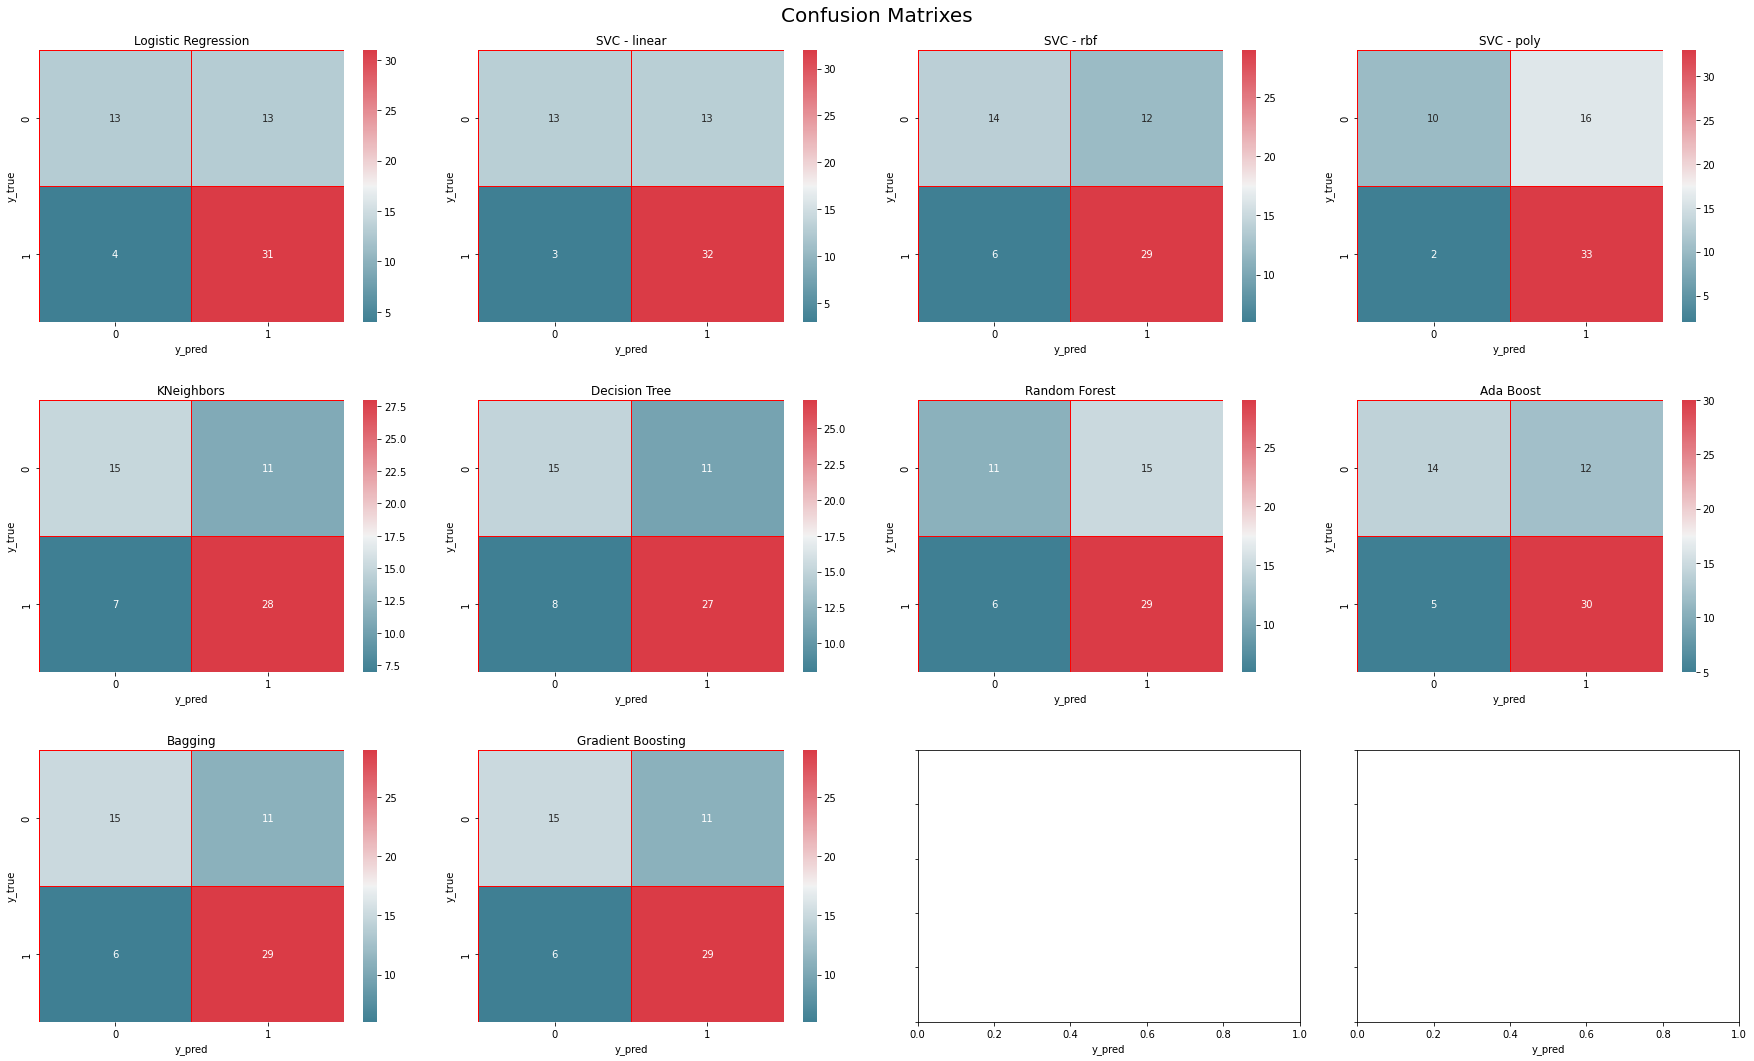

In [72]:
from sklearn.metrics import confusion_matrix

fig, axs = plt.subplots(3, 4, figsize=(25,15))

i = 0
j = 0
cmap = sns.diverging_palette(220, 10, as_cmap=True)

for name, model in models:
  cm = confusion_matrix(y_test, model.predict(x_test))
  sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",cmap=cmap,fmt=".0f",ax=axs[i,j])
  axs[i,j].set_title(name)
  j=j+1
  if j == 4:
    i=i+1
    j=0

for ax in axs.flat:
    ax.set(xlabel='y_pred', ylabel='y_true')
    ax.label_outer()

fig.tight_layout(pad=3.0)
fig.suptitle("Confusion Matrixes", fontsize=20, verticalalignment='bottom')
fig.show()